In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Mon Aug 24 16:35:51 2020

@author: Henning Dorff
"""
import os
import sys

import numpy as np
import pandas as pd
import xarray as xr

start_path=os.getcwd()
plot_path=start_path+"/../plots/"
ac3_scripts_path=start_path+"/../scripts/"
ac3_plots_path=start_path+"/../plotting/"
my_git_path=start_path+"/../../"
major_work_path=my_git_path+"/../Work/GIT_Repository/"
synth_ar_path=my_git_path+"/Synthetic_Airborne_Arctic_ARs/"
hamp_processing_path=my_git_path+"/hamp_processing_python/"
config_path=synth_ar_path+"config/"
sys.path.insert(1,config_path)
sys.path.insert(2,ac3_scripts_path)
sys.path.insert(3,synth_ar_path+"/src/")
sys.path.insert(4,synth_ar_path+"/plotting/")
sys.path.insert(5,hamp_processing_path)
sys.path.insert(6,hamp_processing_path+"/plotting/")
sys.path.insert(7,ac3_plots_path)
import data_config
###############################################################################
import flightcampaign
import moisturebudget as Budgets
###############################################################################
#Grid Data
from reanalysis import ERA5,CARRA
from ICON import ICON_NWP as ICON
import gridonhalo as Grid_on_HALO
###############################################################################
#-----------------------------------------------------------------------------#
import warnings
warnings.filterwarnings("ignore")

class HiddenPrints:
    def __enter__(self):
        self._original_stdout = sys.stdout
        sys.stdout = open(os.devnull, 'w')

    def __exit__(self, exc_type, exc_val, exc_tb):
        sys.stdout.close()
        sys.stdout = self._original_stdout

C:\Users\u300737\AppData\Local\anaconda3\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [2]:
import Airborne_Budget_Plots

In [3]:
campaign="HALO_AC3"
ar_of_day="AR_entire_1"
flight=["RF05"]

sector_to_plot="warm"
take_arbitary=True
do_plotting=True

from simplified_flight_leg_handling import simplified_run_grid_main
with HiddenPrints():
    halo_era5,halo_df,cmpgn_cls,ERA5_on_HALO,radar,Dropsondes=\
        simplified_run_grid_main(flight=flight,config_file_path=major_work_path,ar_of_day=ar_of_day)
flight=cmpgn_cls.flight
cmpgn_cls.plot_path=cmpgn_cls.campaign_data_path+"/plots/"

flight_dates={
    "RF03":"20220313",
    "RF05":"20220315",
    "RF06":"20220316",
    "RF16":"20220410"}
halo_era5.describe()

,Minutesofday,Halo_Lat,Halo_Lon,Closest_Era_Lat,Closest_Era_Lon,Interp_IWV,Interp_E,Interp_Precip,Interp_LWP,Interp_IWP,Interp_IVT,Interp_SST,IVT_max_distance
count,11100.000000,11100.000000,11100.000000,11100.000000,11100.000000,11100.000000,11100.000000,11100.000000,11100.000000,11100.000000,11100.000000,11100.000000,1.110000e+04
mean,103.000000,74.358359,-3.209102,74.360158,-3.208761,12.329167,0.005492,0.158041,64.103600,64.630378,317.984140,274.248823,9.657791e+05
std,53.406525,1.851320,8.496497,1.857501,8.497259,3.473149,0.023601,0.166236,40.106605,59.310235,113.896472,2.238907,7.694805e+05
min,11.000000,71.004653,-17.905399,71.000000,-18.000000,5.902906,-0.045707,0.000000,4.025799,0.370804,129.540810,271.460449,-3.501481e+05
25%,57.000000,72.674204,-10.425367,72.750000,-10.500000,9.157659,-0.006973,0.023139,31.734223,13.600789,219.301754,272.475696,2.809600e+05
50%,103.000000,74.668138,-3.405043,74.750000,-3.500000,13.173066,0.007989,0.089672,60.268500,44.546095,347.266875,273.598646,9.787637e+05
75%,149.000000,75.985555,3.423181,76.000000,3.500000,15.611252,0.016267,0.271124,96.231072,119.476279,418.038945,276.365117,1.646911e+06
max,195.000000,77.000478,13.164154,77.000000,13.250000,16.595042,0.056041,0.624785,158.051539,190.198071,488.873875,278.451862,2.257273e+06


In [4]:
haloac3_budget_plots = Airborne_Budget_Plots.HALO_AC3_Budget_Plots(cmpgn_cls,flight,ar_of_day)
haloac3_evaporation  = Airborne_Budget_Plots.HALO_AC3_evaporation(cmpgn_cls,flight,ar_of_day,halo_df)

RF05_AR_entire_1_interpolated_HMP.csv  is already calculated and will be opened
halo_era5
Evaporation fig saved as: C:\Users\u300737\Desktop\Desktop_alter_Rechner\PhD_UHH_WIMI\my_GIT\HALO_AC3_AR_Budget_Closure\notebooks/..//plots/RF05_AR_entire_1_ICON_ERA5_comparison.png


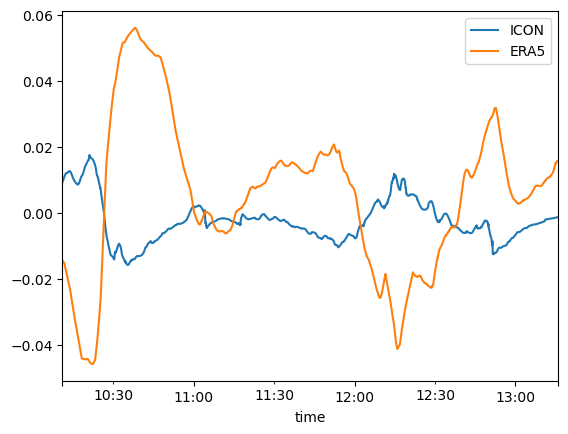

In [5]:
haloac3_evaporation.run_ICON_ERA5_evaporation_comparison(halo_era5)

### Sonde based statistics

In [6]:
Evap_Sectors=pd.DataFrame(data=np.nan,columns=["mean","std"],index=["S1","S2","S3","S4"])
mean_values=[0.002438,0.00275,-0.015,-0.0038]
std_values=[0.006509,0.005,0.0083,0.0101]
Evap_Sectors["mean"]=mean_values
Evap_Sectors["std"]=std_values
Evap_Sectors

,mean,std
S1,0.002438,0.006509
S2,0.002750,0.005000
S3,-0.015000,0.008300
S4,-0.003800,0.010100


In [8]:
# Warm sector evaporation
halo_icon_hmp=haloac3_evaporation.halo_icon_hmp
warm_icon_evap=-1*halo_icon_hmp["Interp_EV"].copy()
inflow_times=["2022-03-15 10:11","2022-03-15 11:13"]
internal_times=["2022-03-15 11:18","2022-03-15 12:14"]
outflow_times=["2022-03-15 12:20","2022-03-15 13:15"]

warm_icon_evap.loc["2022-03-15 10:45":"2022-03-15 11:45"]=np.nan
warm_icon_evap.loc["2022-03-15 12:48":"2022-03-15 13:15"]=np.nan
print(warm_icon_evap.std())

warm_era5_evap=halo_era5["Interp_E"].copy()*-1
warm_era5_evap.loc["2022-03-15 10:45":"2022-03-15 11:45"]=np.nan
warm_era5_evap.loc["2022-03-15 12:48":"2022-03-15 13:15"]=np.nan
print(warm_era5_evap.mean())

0.008429681186788331
0.0005174798818550748
